In [71]:
import re
import numpy as np
import pandas as pd
import os
import PIL
import random
import shutil
import matplotlib.pyplot as plt
import PIL
import sys
import cv2
from tqdm import tqdm
from PIL import Image, ImageMath 

from skimage.transform import rescale, resize, downscale_local_mean
from img_processing_256 import rename, random_flip_img_train
%matplotlib inline

In [81]:
def create_patches2(crop_dir, Lbls, size=256, debug=True):
    patch_list = []
    Lbl_list = []
    FN_list = []
    
    crops = os.listdir(crop_dir)
    counter = 0
    if debug is None:
        progress(counter, len(crops), 'WORKING')
    for crop in tqdm(crops):
        counter += 1
        if debug is None:
            progress(counter, len(crops), crop)
        base_img_file = crop[:-6] + ".png"
        crop_img = PIL.Image.open(crop_dir+"/"+crop)
        
        #compare = base_img_file[14:]
        compare = base_img_file[10:]
        #print(compare)
        try:
            Lbl = Lbls.loc[compare]['Class']
        except:
            print("Error LabelNotFound", base_img_file)
            continue
        #print(crop)    
        crop_img_arr = np.array(crop_img)[:,:]
        #print(crop_img_arr.shape)
        patch = crop_img_arr
        
        patch_list.append(patch)
        Lbl_list.append(Lbl)
        FN_list.append(base_img_file)
        
    return np.array(patch_list), np.array(Lbl_list), np.array(FN_list)

In [73]:
#Calc_training
train_labels = pd.read_pickle("label old ver/train_label.pkl")
train_labels['IMAGE_NAME2'] = train_labels.index
train_labels = train_labels.drop_duplicates(['IMAGE_NAME2'])

## use a copy on the local drive to make testing faster
crop_dir = "D:/mammography/cropped_images/train_png/Calc"

train_calc_patch, train_calc_Lbl, train_calc_FN = \
    create_patches2(crop_dir, Lbls=train_labels, debug=True)

100%|██████████████████████████████████████████████████████████████████████████████| 1546/1546 [00:16<00:00, 92.17it/s]


In [74]:
print("Train calc patches shape:", train_calc_patch.shape)
print("Train calc Labels:", len(train_calc_Lbl))
print("Train calc File Name:", len(train_calc_FN))

Train calc patches shape: (1546,)
Train calc Labels: 1546
Train calc File Name: 1546


In [75]:
train_calc_FN

array(['Calc-Training_P_00005_RIGHT_CC.png',
       'Calc-Training_P_00005_RIGHT_MLO.png',
       'Calc-Training_P_00007_LEFT_CC.png', ...,
       'Calc-Training_P_02572_LEFT_MLO.png',
       'Calc-Training_P_02584_LEFT_CC.png',
       'Calc-Training_P_02584_LEFT_MLO.png'], dtype='<U35')

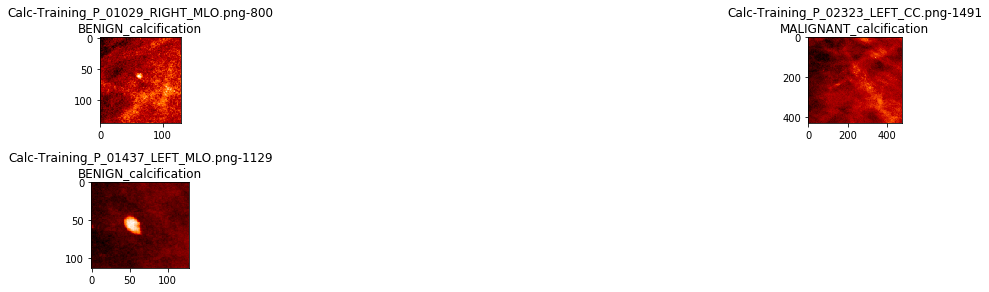

In [76]:
# random images 
N = 3
idx = random.sample(range(len(train_calc_patch)), k=N)
plt.figure(figsize=(20,20))
for i, j in enumerate(idx):
    plt.subplot(10,2,i+1)
    plt.imshow(train_calc_patch[j], cmap='gist_heat')
    #plt.title(train_calc_FN[j] + " - " + str(j)+ "\n" + "Mean:" + str(round(np.mean(train_calc_patch[j]),3)) + " | Var:" + str(round(np.var(train_calc_patch[j]),3)))
    plt.title(train_calc_FN[j] + "-" + str(j) + "\n" + train_calc_Lbl[j])
    plt.tight_layout()
plt.show()

In [77]:
np.save(os.path.join("new_npy", "train_calc_patch.npy"), train_calc_patch)
np.save(os.path.join("new_npy", "train_calc_Lbl.npy"), np.array(train_calc_Lbl))
np.save(os.path.join("new_npy", "train_calc_FN.npy"), train_calc_FN)

In [78]:
#Mass_training
train_labels = pd.read_pickle("label old ver/train_label.pkl")
train_labels['IMAGE_NAME2'] = train_labels.index
train_labels = train_labels.drop_duplicates(['IMAGE_NAME2'])

## use a copy on the local drive to make testing faster
crop_dir = "D:/mammography/cropped_images/train_png/Mass"
train_mass_patch, train_mass_Lbl, train_mass_FN = \
    create_patches2(crop_dir, Lbls=train_labels, debug=True)


100%|█████████████████████████████████████████████████████████████████████████████| 1318/1318 [00:10<00:00, 126.53it/s]


In [79]:
print("Train mass patches shape:", train_mass_patch.shape)
print("Train mass Labels:", len(train_mass_Lbl))
print("Train mass File Name:", len(train_mass_FN))

Train mass patches shape: (1318,)
Train mass Labels: 1318
Train mass File Name: 1318


In [80]:
np.save(os.path.join("npy", "train_mass_patch.npy"), train_mass_patch)
np.save(os.path.join("npy", "train_mass_Lbl.npy"), np.array(train_mass_Lbl))
np.save(os.path.join("npy", "train_mass_FN.npy"), train_mass_FN)

In [82]:
#Calc_test
test_labels = pd.read_pickle("label old ver/test_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

## use a copy on the local drive to make testing faster
crop_dir = "D:/mammography/cropped_images/test_png/Calc"

test_calc_patch, test_calc_Lbl, test_calc_FN = \
    create_patches2(crop_dir, Lbls=test_labels, debug=True)


100%|████████████████████████████████████████████████████████████████████████████████| 326/326 [00:05<00:00, 56.66it/s]


In [83]:
print("Test calc patches shape:", test_calc_patch.shape)
print("Test calc Labels:", len(test_calc_Lbl))
print("Test calc File Name:", len(test_calc_FN))

Test calc patches shape: (326,)
Test calc Labels: 326
Test calc File Name: 326


In [84]:
np.save(os.path.join("npy", "test_calc_patch.npy"), test_calc_patch)
np.save(os.path.join("npy", "test_calc_Lbl.npy"), np.array(test_calc_Lbl))
np.save(os.path.join("npy", "test_calc_FN.npy"), test_calc_FN)

In [85]:
#Mass_test
test_labels = pd.read_pickle("label old ver/test_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

## use a copy on the local drive to make testing faster
crop_dir = "D:/mammography/cropped_images/test_png/Mass"

test_mass_patch, test_mass_Lbl, test_mass_FN = \
    create_patches2(crop_dir, Lbls=test_labels, debug=True)


100%|███████████████████████████████████████████████████████████████████████████████| 378/378 [00:02<00:00, 148.82it/s]


In [86]:
print("Test mass patches shape:", test_mass_patch.shape)
print("Test mass Labels:", len(test_mass_Lbl))
print("Test mass File Name:", len(test_mass_FN))

Test mass patches shape: (378,)
Test mass Labels: 378
Test mass File Name: 378


In [87]:
np.save(os.path.join("npy", "test_mass_patch.npy"), test_mass_patch)
np.save(os.path.join("npy", "test_mass_Lbl.npy"), np.array(test_mass_Lbl))
np.save(os.path.join("npy", "test_mass_FN.npy"), test_mass_FN)

In [88]:
#데이터 합치기
train_patch = np.concatenate([train_mass_patch, train_calc_patch], axis=0)
train_Lbl = np.concatenate([train_mass_Lbl, train_calc_Lbl], axis=0)
train_FN = np.concatenate([train_mass_FN, train_calc_FN], axis=0)

test_patch = np.concatenate([test_mass_patch, test_calc_patch], axis=0)
test_Lbl = np.concatenate([test_mass_Lbl, test_calc_Lbl], axis=0)
test_FN = np.concatenate([test_mass_FN, test_calc_FN], axis=0)

In [89]:
print("Train Patches:", train_patch.shape)
print("Train Lables:", train_Lbl.shape)
print("Train File Names:", train_FN.shape)

print("Test Patches:", test_patch.shape)
print("Test Lables:", test_Lbl.shape)
print("Test File Names:", test_FN.shape)

Train Patches: (2864,)
Train Lables: (2864,)
Train File Names: (2864,)
Test Patches: (704,)
Test Lables: (704,)
Test File Names: (704,)


In [90]:
np.save(os.path.join("new_abnormal", "abnormal_train_patch.npy"), train_patch)
np.save(os.path.join("new_abnormal", "abnormal_train_Lbl.npy"), train_Lbl)
np.save(os.path.join("new_abnormal", "abnormal_train_FN.npy"), train_FN)

np.save(os.path.join("new_abnormal", "abnormal_test_patch.npy"), test_patch)
np.save(os.path.join("new_abnormal", "abnormal_test_Lbl.npy"), test_Lbl)
np.save(os.path.join("new_abnormal", "abnormal_test_FN.npy"), test_FN)